In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import pandas as pd

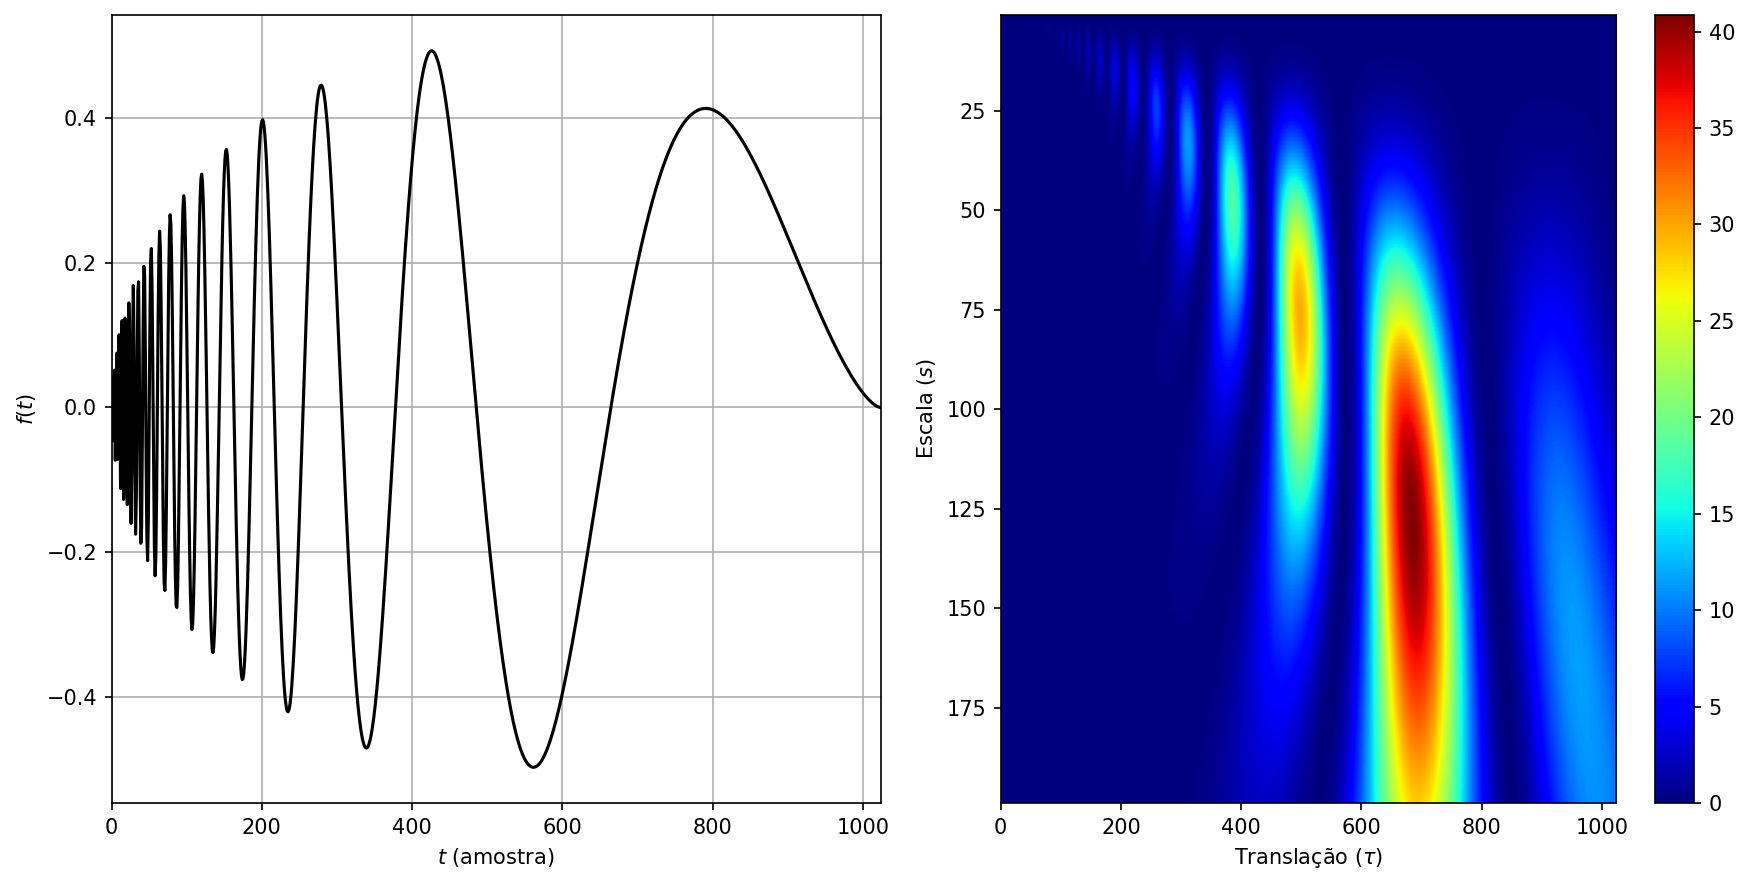

In [3]:
#Pacote PyWavelets
import pywt

#Exemplo da CWT para analisar um sinal com frequência variável

signal   = pywt.data.demo_signal('doppler', 1024)   #Sinal doppler
scale   = np.arange(1, 200)                        #Escalas utilizadas
wavelet_mae = 'gaus1'                                  # Wavelet gaussiana com 1 momento nulo

coef, freqs = pywt.cwt(signal, scale, wavelet_mae, method='fft') #coeficientes wavelets
coef_       = np.abs(coef)**2                      #obtêm o Esclograma

plt.figure(dpi=150, figsize=(12, 6))

plt.subplot(121)
plt.plot(signal, color='k')
plt.xlabel('$t $ (amostra)')
plt.ylabel('$f(t)$')
plt.xlim([0, len(signal)])
plt.grid()

plt.subplot(122)
plt.imshow(coef_, extent=[0, len(signal), scale[-1], scale[0]], cmap='jet', aspect='auto')
plt.xlabel('Translação ($\\tau$)')
plt.ylabel('Escala ($s$)')
plt.ylim([scale[-1], scale[0]])
plt.xlim([0, len(signal)])
plt.colorbar()

plt.tight_layout()
plt.show()

In [5]:
coef_df = pd.DataFrame(coef_)

# Transform it to a long format
df=coef_df.unstack().reset_index()

df.columns=["X","Y","Z"]

# And transform the old column name in something numeric
df['X']=pd.Categorical(df['X'])
df['X']=df['X'].cat.codes



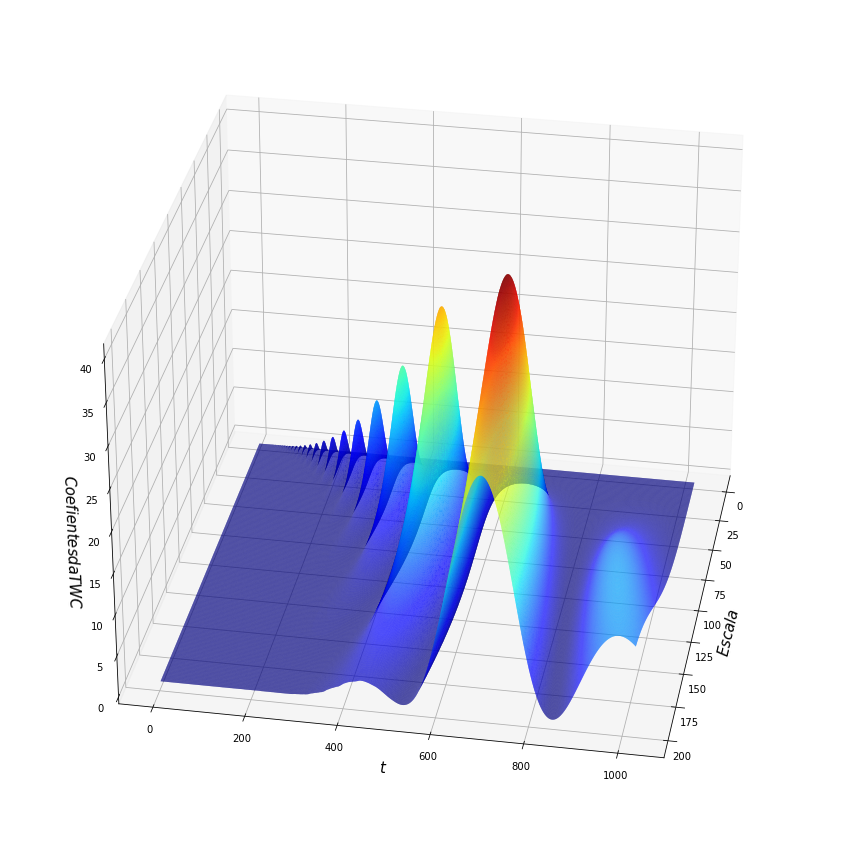

In [6]:
# Make the plot
fig = plt.figure(figsize = (15,16))
ax = fig.add_subplot(projection ='3d')
ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap="jet", linewidth=0.2)
ax.set_xlabel('$Escala$', fontsize=15)
ax.set_ylabel('$t$', fontsize=15)
ax.set_zlabel('$Coefientes da TWC$', fontsize=15, rotation = 0)

# Set the angle of the camera
ax.view_init(30,10) #(30,110)
